In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [3]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [4]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

In [135]:
def findShape(image):
    displayColorImage(image, "Original Image")
    gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
    displayGrayScaleImage(gray, "Gray Scale Image")
    ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ct = imutils.grab_contours(ct)
    cl = image.copy()
    cv2.drawContours(cl, ct, -1, (0,0,255),5)
    displayColorImage(cl, "Image with contours")
    
    for(i, c) in enumerate(ct):
        shape=""
        cl = image.copy()
        contour_area = cv2.contourArea(c)
        (x,y,w,h) = cv2.boundingRect(c)
        bounding_rect_area = w*h
        if(float(h)!=0.0):
            aspect_ratio = w/float(h)
        else:
            aspect_ratio = 0.0
        
        if(float(bounding_rect_area)!=0):
            extent = contour_area/float(bounding_rect_area)
        else:
            extent = 0.0
        
            
        hull = cv2.convexHull(c)
        hullarea = cv2.contourArea(hull)
        if(float(hullarea)!=0.0):
            solidity = contour_area / float(hullarea) 
        else:
            solidity = 0.0
        
        text = "aspect ratio:{:.2f}, extent: {:.2f} , solidity: {:.2f}".format(aspect_ratio, extent, solidity)
        print(text)
        cv2.putText(cl, text,(x,y+50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,0,255),3)
        displayColorImage(cl, "with contour properties")
        

### Draw image

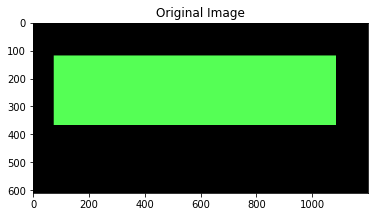

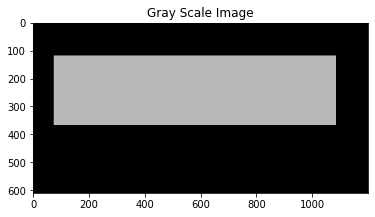

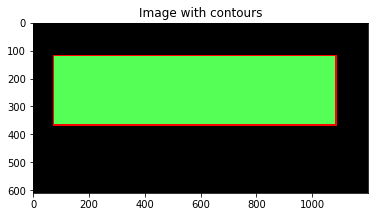

aspect ratio:4.05, extent: 1.00 , solidity: 1.00


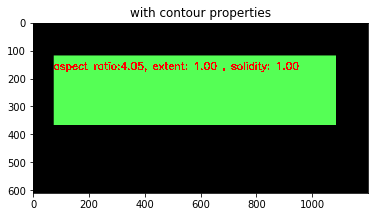

In [136]:
image = cv2.imread("./data/rectangle.png")
findShape(image)

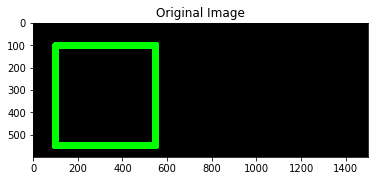

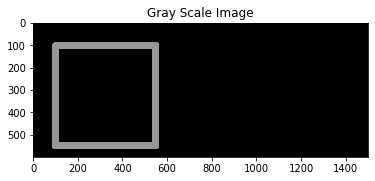

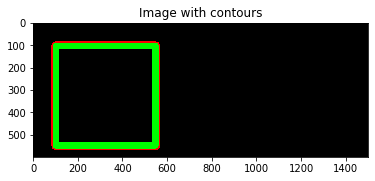

aspect ratio:1.00, extent: 0.99 , solidity: 1.00


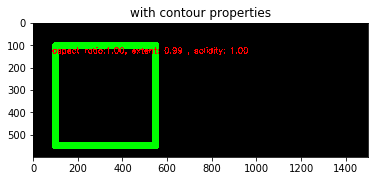

In [139]:
image = np.zeros((600,1500,3), dtype="uint8")
cv2.rectangle(image, (100,100), (550,550), (0,255,0), 30)
findShape(image)

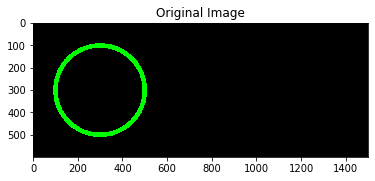

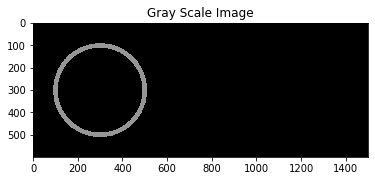

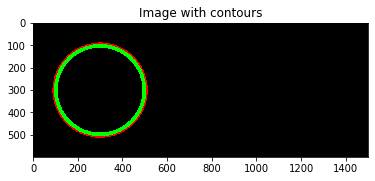

aspect ratio:1.00, extent: 0.78 , solidity: 1.00


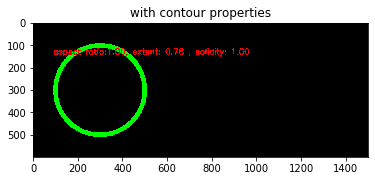

In [138]:
image = np.zeros((600,1500,3), dtype="uint8")
cv2.circle(image, (300,300), 200, (0,255,0), 20)
findShape(image)

In [164]:
def recognizeShape(image):
    displayColorImage(image, "Original Image")
    gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
    displayGrayScaleImage(gray, "Gray Scale Image")
    ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ct = imutils.grab_contours(ct)
    cl = image.copy()
    cv2.drawContours(cl, ct, -1, (0,0,255),5)
    displayColorImage(cl, "Image with contours")

    for(i, c) in enumerate(ct):
        shape=""
        #cl = image.copy()
        contour_area = cv2.contourArea(c)
        (x,y,w,h) = cv2.boundingRect(c)
        bounding_rect_area = w*h
        if(float(h)!=0.0):
            aspect_ratio = w/float(h)
        else:
            aspect_ratio = 0.0
        
        if(float(bounding_rect_area)!=0):
            extent = contour_area/float(bounding_rect_area)
        else:
            extent = 0.0
        
            
        hull = cv2.convexHull(c)
        hullarea = cv2.contourArea(hull)
        if(float(hullarea)!=0.0):
            solidity = contour_area / float(hullarea) 
        else:
            solidity = 0.0
        if(aspect_ratio >=0.9 and aspect_ratio<=1.2):
            if(extent>=0.9 and aspect_ratio<=1.2):
                shape="square"
            else:
                shape="circle"
        else:
            shape="rectangle"
            
        text = "aspect ratio:{:.2f}, extent: {:.2f} , solidity: {:.2f}".format(aspect_ratio, extent, solidity)
        print(text)
        cv2.putText(cl, shape,(x,y+50), cv2.FONT_HERSHEY_SIMPLEX, 3.0, (0,0,255),6)
        
    displayColorImage(cl, "with contour properties")

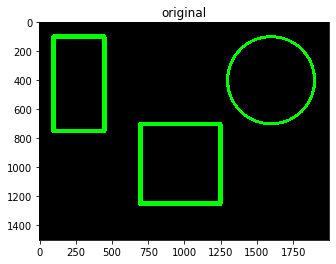

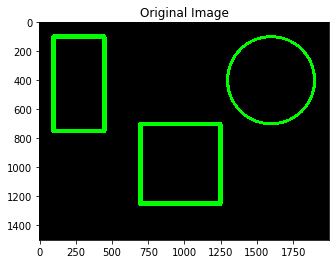

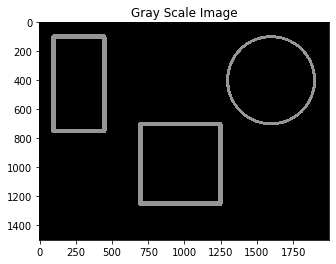

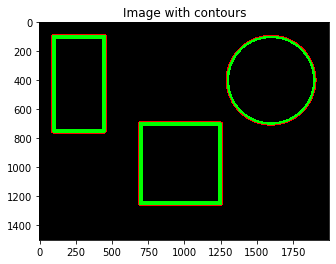

aspect ratio:1.00, extent: 1.00 , solidity: 1.00
aspect ratio:1.00, extent: 0.78 , solidity: 1.00
aspect ratio:0.56, extent: 1.00 , solidity: 1.00


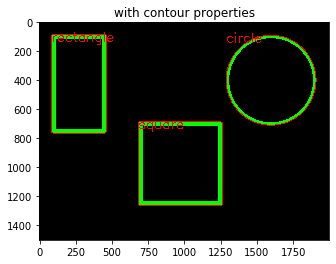

In [165]:
image = np.zeros((1500,2000,3), dtype="uint8")
cv2.rectangle(image, (100,100), (450,750), (0,255,0), 30)
cv2.rectangle(image, (700,700), (1250,1250), (0,255,0), 30)
cv2.circle(image, (1600,400), 300, (0,255,0), 20)
displayColorImage(image, "original")
recognizeShape(image)